Введение в Пандас. Анализ данных Нью-Йоркского байк-шеринга за январь 2018 год

* [all data](https://s3.amazonaws.com/tripdata/index.html)
* [info](https://www.citibikenyc.com/system-data)

In [1]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

import pandas as pd

# Reading the dataset

In [2]:
path = '../data/l5/201801-citibike-tripdata.csv.zip'
df = pd.read_csv(path)

In [3]:
df.shape  # 15 колонок, ~719 тысяч поездок

(718994, 15)

In [4]:
df.head(3)
# or df.tail(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1


In [5]:
Y = df.loc[df.tripduration < size, 'tripduration']

NameError: name 'size' is not defined

# Распределение

In [69]:
import scipy
import numpy as np
from scipy import stats

In [140]:
size=35

In [141]:
Y = df.loc[df.tripduration < size, 'tripduration']

In [142]:
def plot_pdf(dist, y, size, name, ax=None):
    x = scipy.arange(size)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    
    if ax is None:
        fig, ax = plt.subplots()
        
    ax.plot(pdf_fitted, label=name, alpha=.3)


In [145]:
distributions = {
    'beta': stats.beta,
    'gamma': stats.gamma,
    'weibull_min': stats.weibull_min
}

/Users/philippk/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


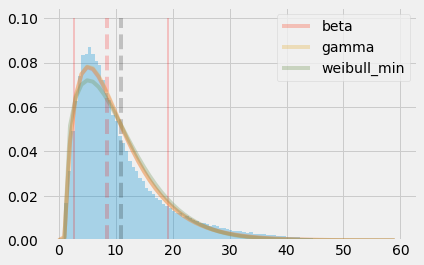

In [146]:
ax = df[mask]['tripduration'].hist(bins=100, density=1, alpha=.3)
ax.vlines(mean_ctd, 0, .1, linestyles='--', color='black', alpha=.2)
ax.vlines(median_ctd, 0,.1, linestyles='--', color='red', alpha=.2)
ax.vlines([mean_ctd + STD, mean_ctd - STD], 0, .1,  color='red', alpha=.2, linewidth=2)

for name, distr in distributions.items():
    plot_pdf(distr, Y, 60, name, ax)
    
plt.legend()

In [148]:
param = stats.beta.fit(y)
pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])

/Users/philippk/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/philippk/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [152]:
pdf_fitted[9:].sum()  # примерный шанс что путеществие будет больше чем 9 минут -- почти 50%, что (почти) бьется с медианой.

0.53314147679346757

In [155]:
pdf_fitted[20:].sum() # примерный шанс что путеществие будет больше чем 20 минут ~ 13%

0.1270940150203477